Importing Necessary Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dataoverview of Train_Dataset

In [3]:
def optimize_memory(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

chunks = []
train_dataset = r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\GUIDE_Train.csv (1)\GUIDE_Train.csv"
# Read the dataset in chunks and process each chunk
for chunk in pd.read_csv(train_dataset, chunksize=500000,low_memory=False):
    chunk = optimize_memory(chunk)
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Clean up memory
del chunks

In [45]:
# First five rows of the dataset
print("First Few Rows of the Dataset:")
df.head()


First Few Rows of the Dataset:


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ResourceIdName,OSFamily,Year,Month,DayOfWeek,Hour,State_0.0,City_0.0,OSVersion_0.0,CountryCode_0.0
3,60129547292,222,15294,917686,0,0.000000,5,1,1,1,...,3586,5,1.0,0.454545,0.333333,0.521739,True,True,True,True
27,481036339557,5,188,938345,19,0.063559,5,2,1,1,...,3586,5,1.0,0.454545,0.166667,0.782609,True,True,True,True
36,592705490728,72,153,897444,4,0.012712,5,2,0,1,...,3586,5,1.0,0.454545,0.333333,0.608696,True,True,True,True
42,1400159341397,205,15974,148173,1,0.004237,5,2,5,1,...,3586,5,1.0,0.454545,0.833333,1.000000,True,True,True,True
53,1039382087781,90,205,883099,0,0.000000,5,2,1,1,...,3586,5,1.0,0.454545,0.000000,0.869565,True,True,True,True


In [46]:
# shape of the dataset
print("\nShape of the dataset:", df.shape)



Shape of the dataset: (349141, 38)


In [47]:
# Column names
print("Column Names in the Dataset:")
df.columns


Column Names in the Dataset:


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'Year', 'Month',
       'DayOfWeek', 'Hour', 'State_0.0', 'City_0.0', 'OSVersion_0.0',
       'CountryCode_0.0'],
      dtype='object')

In [48]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 349141 entries, 3 to 4147975
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  349141 non-null  int64  
 1   OrgId               349141 non-null  int64  
 2   IncidentId          349141 non-null  int64  
 3   AlertId             349141 non-null  int64  
 4   DetectorId          349141 non-null  int64  
 5   AlertTitle          349141 non-null  float64
 6   Category            349141 non-null  int64  
 7   IncidentGrade       349141 non-null  int64  
 8   EntityType          349141 non-null  int64  
 9   EvidenceRole        349141 non-null  int64  
 10  DeviceId            349141 non-null  int64  
 11  Sha256              349141 non-null  int64  
 12  IpAddress           349141 non-null  int64  
 13  Url                 349141 non-null  int64  
 14  AccountSid          349141 non-null  int64  
 15  AccountUpn      

In [49]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
Year                  0
Month                 0
DayOfWeek             0
Hour                  0
State_0.0             0
City_0.0              0
OSVersion_0.0         0
CountryCode_0.0       0
dtype: int64

In [50]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)



Number of duplicate rows in the dataset: 0


In [51]:
# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())


Target variable distribution:
IncidentGrade
2    303765
0     24124
1     21252
Name: count, dtype: int64


EDA 

C:\Users\nandh\AppData\Local\Temp\ipykernel_21060\133486609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['IncidentGrade'], palette='viridis')  # Try palettes like 'viridis', 'coolwarm', etc.


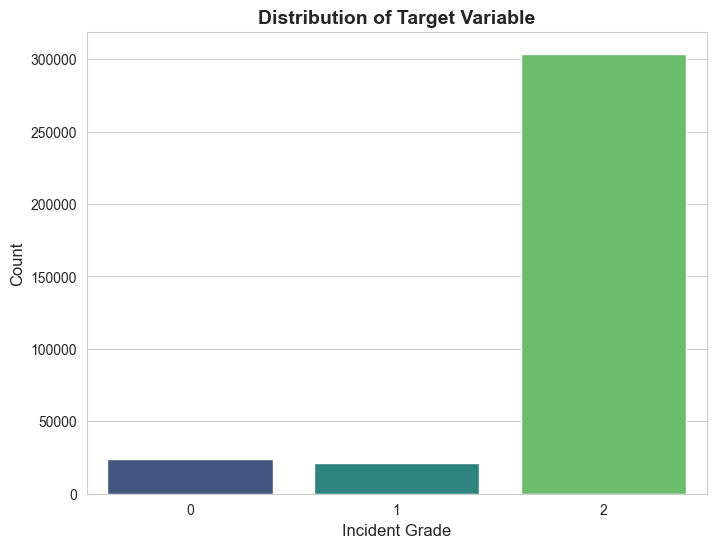

In [53]:
# Set the Seaborn style
sns.set_style("whitegrid")  # Change style to 'whitegrid', 'darkgrid', etc.

# Plot with a custom color palette
plt.figure(figsize=(8, 6))
sns.countplot(x=df['IncidentGrade'], palette='viridis')  # Try palettes like 'viridis', 'coolwarm', etc.
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Incident Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


Insights:

Dominance of Grade 2:
The majority of incidents in the dataset are categorized as IncidentGrade = 2.
This indicates that this grade is far more frequent compared to the others (0 and 1).

Low Count of Grade 0:
IncidentGrade = 0 has the least occurrences in the dataset, implying it represents a rare or less significant category of incidents.

Moderate Count of Grade 1:
IncidentGrade = 1 falls between 0 and 2 in terms of count. It might represent incidents of moderate priority or severity.

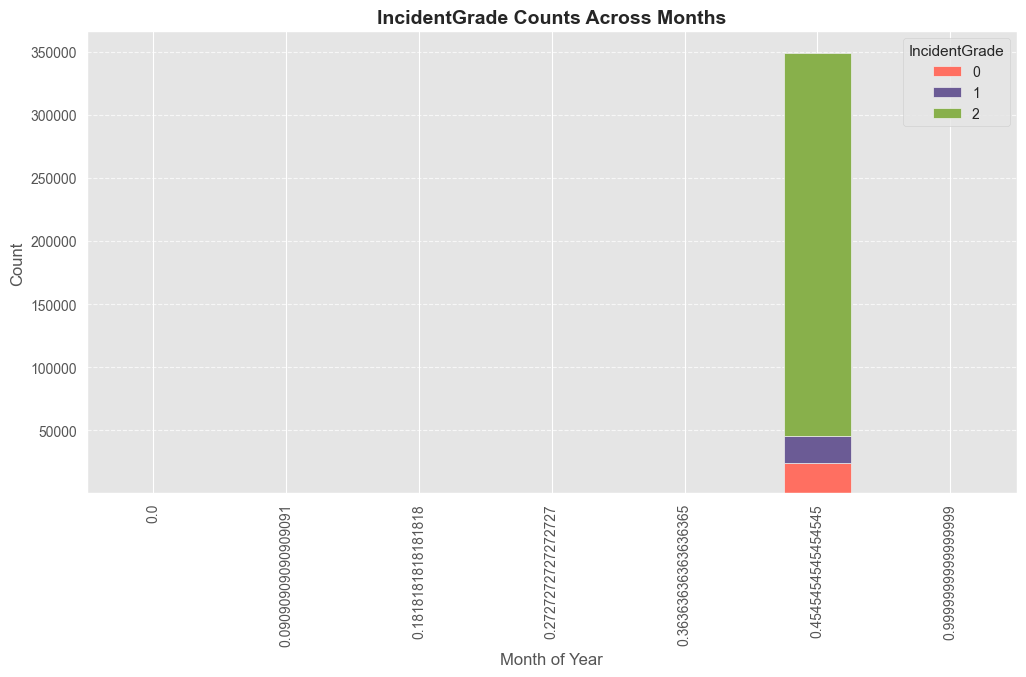

In [ ]:
# Plot with customized style and color
plt.style.use('ggplot')  # Change style to 'ggplot', 'seaborn', or others

# Custom color palette for the stacked bar plot
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # Define colors for each 'IncidentGrade'

month_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Update labels and title with font adjustments
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('IncidentGrade Counts Across Months', fontsize=14, fontweight='bold')
plt.legend(title='IncidentGrade', fontsize=10, title_fontsize=11)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Insights:

Grade 2 Dominance: The majority of incidents are IncidentGrade = 2, regardless of the month.

Minimal Grades 0 and 1: Very few incidents fall under IncidentGrade = 0 or 1.

Imbalance Issue: Severe class imbalance persists across all months.

Consistent Distribution: Monthly data patterns remain similar for all grades.

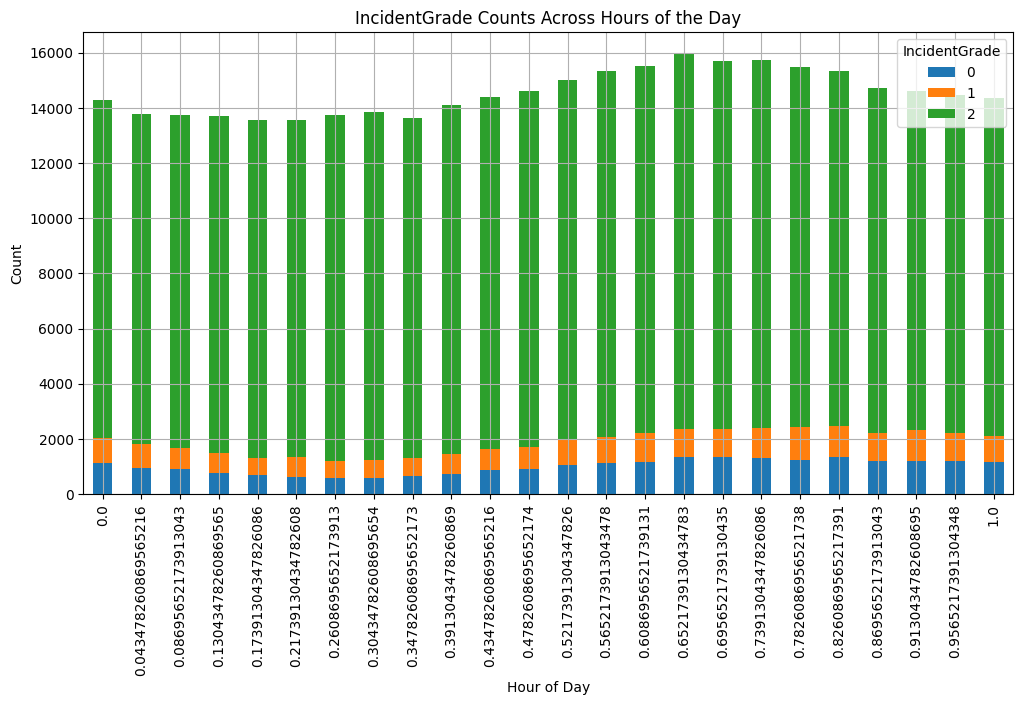

In [38]:
# Aggregate data
hour_incident_grade = df.groupby(['Hour', 'IncidentGrade']).size().unstack()

# Plot
hour_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

Insights:

Incident Grade 0: This grade shows a consistent pattern throughout the day, with a slight increase in the early morning hours.

Incident Grade 1: This grade also exhibits a relatively stable pattern, with a peak around the early afternoon.

Incident Grade 2: This grade shows a more pronounced pattern with a clear peak in the late afternoon and early evening.

Overall, the graph suggests that incident grades 1 and 2 are more likely to occur during the afternoon and evening hours.

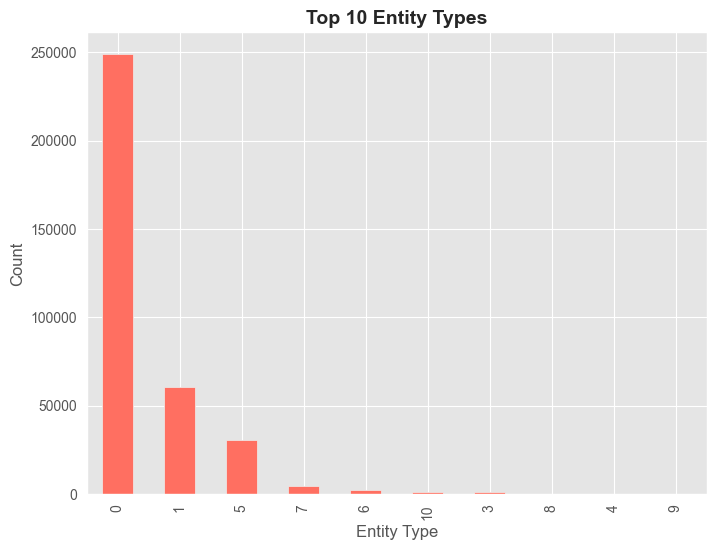

In [ ]:
# Plot with customized color
df['EntityType'].value_counts().head(10).plot(
    kind='bar', 
    color='#FF6F61',  # Replace with your preferred color
    figsize=(8, 6)
)

# Add labels and title
plt.title('Top 10 Entity Types', fontsize=14, fontweight='bold')
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()



Insights:

Entity Type 0: This entity type has the highest count, significantly higher than the other types.

Entity Types 1 and 5: These two types have the next highest counts, but still significantly lower than entity type 0.

The remaining entity types (2, 3, 4, 6, 7, 8, 9): These types have relatively low counts compared to the top three.

Overall, the chart indicates that entity type 0 is the most common, followed by entity types 1 and 5. The remaining entity types are much less frequent.

Data Preprocessing of Train_Dataset

In [12]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

file_path = r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\GUIDE_Train.csv (1)\GUIDE_Train.csv"

# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=500000, low_memory=False)
df = pd.concat(chunks, ignore_index=True)

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("Columns with more than 50% missing values and dropped:")
print(columns_to_drop)

# Drop these columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Impute missing values for numeric columns
numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed numeric column '{col}' with median value: {median_val}")

# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode value: {mode_val}")

# Handling Outliers
def outliers(df, iqr_multiplier=1.5):
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64', 'float64'])
    for col in numeric_features.columns:
        if df[col].nunique() > 10:
            Q1 = numeric_features[col].quantile(0.25)
            Q3 = numeric_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR   
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Usage
df = outliers(df, iqr_multiplier=1.5) 

# Feature Engineering
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour


# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)

id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId',  'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName','OSFamily']

# Exclude ID columns from scaling
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')

# Scaling numerical features 
scaler = MinMaxScaler()
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary

columns_to_encode = ['State', 'City', 'OSVersion', 'CountryCode']
df[columns_to_encode] = df[columns_to_encode].astype(str)
df = pd.get_dummies(df, columns=columns_to_encode)

# Remove duplicate rows
df.drop_duplicates(inplace=True)



Columns with more than 50% missing values and dropped:
Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')
Imputed categorical column 'IncidentGrade' with mode value: BenignPositive


In [13]:
# Save 
df.to_csv("C:/Users/nandh/OneDrive/Desktop/CAPSTONE4/Train_dataset.csv", index=False)
print("Data preprocessing complete and saved .")

Data preprocessing complete and saved .


Datacleaning of Test_Dataset

In [14]:
def optimize_memory(df):
    # Downcast numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

chunks = []
train_dataset =r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\GUIDE_Test.csv\GUIDE_Test.csv"
# Read the dataset in chunks and process each chunk
for chunk in pd.read_csv(train_dataset, chunksize=500000,low_memory=False):
    chunk = optimize_memory(chunk)
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Clean up memory
del chunks

In [15]:
# First Five rows of the dataset
print("First Few Rows of the Dataset:")
df.head()

First Few Rows of the Dataset:


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [16]:
# Shape of the dataset
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (4147992, 46)


In [17]:
# Column names
print("Column Names in the Dataset:")
df.columns

Column Names in the Dataset:


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [18]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int16  
 2   IncidentId          int32  
 3   AlertId             int32  
 4   Timestamp           object 
 5   DetectorId          int16  
 6   AlertTitle          int32  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int32  
 15  Sha256              int32  
 16  IpAddress           int32  
 17  Url                 int32  
 18  AccountSid          int32  
 19  AccountUpn          int32  
 20  AccountObjectId     int32  
 21  AccountName         int32  
 22  DeviceName          int32  
 23  NetworkMessageId    int32  
 24  Em

In [19]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()



Missing values:


Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [20]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Number of duplicate rows in the dataset: 104


In [21]:
# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())


Target variable distribution:
IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64


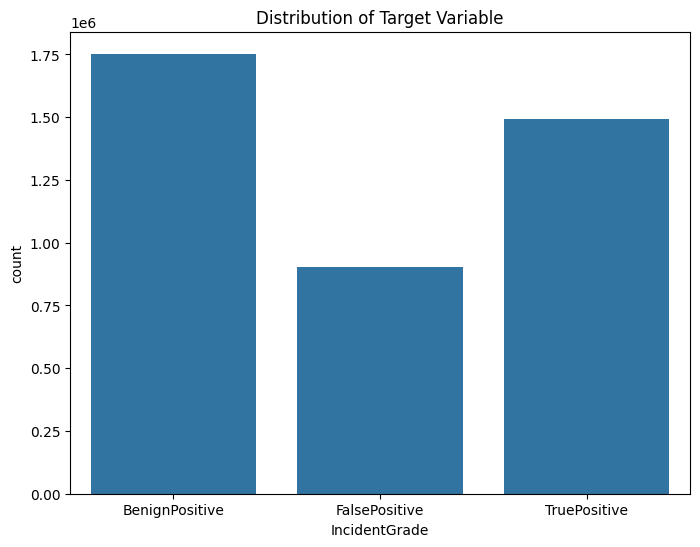

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['IncidentGrade'])
plt.title('Distribution of Target Variable')
plt.show()

Insights:

True Positive: This category has the highest count, indicating a significant number of true positive incidents.

Benign Positive: This category has the second highest count, suggesting a considerable number of incidents that were initially flagged as positive but were later determined to be benign.

False Positive: This category has the lowest count, indicating a smaller number of incidents that were incorrectly flagged as positive.

Overall, the chart suggests that the model is relatively accurate in identifying true positive incidents, but there is a noticeable number of false positive incidents that need to be addressed.

Data preprocessing of Test_Dataset

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

file_path = r"C:\Users\nandh\OneDrive\Desktop\CAPSTONE4\GUIDE_Test.csv\GUIDE_Test.csv"



# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=500000, low_memory=False)
df = pd.concat(chunks, ignore_index=True)

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("Columns with more than 50% missing values and dropped:")
print(columns_to_drop)

# Drop these columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Impute missing values for numeric columns
numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed numeric column '{col}' with median value: {median_val}")

# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode value: {mode_val}")

# Handling Outliers
def outliers(df, iqr_multiplier=1.5):
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64', 'float64'])
    for col in numeric_features.columns:
        Q1 = numeric_features[col].quantile(0.25)
        Q3 = numeric_features[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
            
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Usage
df = outliers(df, iqr_multiplier=1.5)  # Adjusting the IQR multiplier if necessary

# Feature Engineering: Extracting datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour


# Drop the 'Timestamp' and 'Usage'column
df.drop(columns=['Timestamp','Usage'], inplace=True)

id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId',  'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName','OSFamily']

# Exclude ID columns from scaling
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')

# Scaling numerical features 
scaler = MinMaxScaler()
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary
        
columns_to_encode = ['State', 'City', 'OSVersion', 'CountryCode']
df[columns_to_encode] = df[columns_to_encode].astype(str)
df = pd.get_dummies(df, columns=columns_to_encode)

# Remove duplicate rows
df.drop_duplicates(inplace=True)



Columns with more than 50% missing values and dropped:
Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [24]:
# Save the process
df.to_csv("C:/Users/nandh/OneDrive/Desktop/CAPSTONE4/Test_dataset.csv", index=False)
# Read the dataset in chunks and process each chunk
print("Data preprocessing complete and saved .")

Data preprocessing complete and saved .
